# Customer Churn Analysis

<strong>Problem Statement:</strong>

- Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

- Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

- Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

- You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [118]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) # Required to display all columns

In [119]:
#Import Dataset from the Github link
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [120]:
df.shape

(7043, 21)

In [121]:
#lets chcek the null values in the dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We see that maximum of them are categorical columns and one thing to notice is that Total Charges are of object datatype, lets convert them into float data type

In [123]:
set(df['TotalCharges'])

{'1359',
 '503.25',
 '2576.8',
 '305.55',
 '478.1',
 '3126.45',
 '2453.3',
 '300.7',
 '5036.9',
 '812.4',
 '6954.15',
 '2438.6',
 '1090.1',
 '1665.2',
 '7040.85',
 '2971.7',
 '1253.9',
 '472.25',
 '8033.1',
 '365.65',
 '296.1',
 '2647.2',
 '3789.2',
 '518.3',
 '715',
 '123.05',
 '184.95',
 '1681.6',
 '48.6',
 '6890',
 '3919.15',
 '390.4',
 '69.2',
 '4519.5',
 '801.3',
 '2354.8',
 '42.7',
 '1655.35',
 '401.95',
 '7213.75',
 '2727.8',
 '76.35',
 '1798.9',
 '1201.15',
 '3777.15',
 '4513.65',
 '19.9',
 '2576.2',
 '7467.5',
 '6460.55',
 '3888.65',
 '438.4',
 '4779.45',
 '3082.1',
 '712.85',
 '160.8',
 '555.4',
 '218.5',
 '945.7',
 '2869.85',
 '3674.95',
 '5071.9',
 '1864.2',
 '3066.45',
 '350.3',
 '469.25',
 '39.25',
 '1779.95',
 '1664.3',
 '3452.55',
 '2979.5',
 '78.25',
 '24.05',
 '5396.25',
 '7099',
 '171.15',
 '2796.35',
 '470',
 '4533.9',
 '666',
 '1298.7',
 '1177.95',
 '3092.65',
 '5568.35',
 '5124.6',
 '3190.65',
 '2201.75',
 '7982.5',
 '3013.05',
 '79.1',
 '467.5',
 '7344.45',
 '265

We see that TotalCharges has values something like ... which means it is blank,We will have to deal with such values too.So lets convert TotalCharges into float data type and then convert nan values

In [126]:
df["TotalCharges"]=df["TotalCharges"].str.strip()
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])
df["TotalCharges"]

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

Hence, we have successfully converted TotalCharges into float datatype and now lets see the nan values.

In [127]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We see that TotalCharges have 11 null values. Lets first find them and then fill it.

In [130]:
checkTotalCharges=np.where((df['TotalCharges'].isna()==True) )
checkTotalCharges=df.iloc[checkTotalCharges]
checkTotalCharges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [131]:
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)

In [132]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

So, we dont have any null values anywhere and we have successfully filled TotalCharges with the mean of TotalCharges

In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


# Data Description

- We have the demographic information about customers including gender, age,partner(married or not)
- Information about Customer account including the number of months staying with the company, paperless billing, payment method, monthly charges, and total charges
- Customer usage behavior, such as streaming TV, streaming movie
- Services which the customer signed up for: phone service, multiples, internet service, online security, online backup, device protection, and tech support
- Customer churn where the customer left.

# Check Duplicates

In [134]:
duplicate = df[df.duplicated(keep = 'last')]
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


There is no duplicates in our dataset

In [135]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [136]:
df['customerID'].value_counts()

0096-FCPUF    1
1194-BHJYC    1
1170-SASML    1
6137-NICCO    1
9943-VSZUV    1
             ..
9621-OUPYD    1
9850-OWRHQ    1
3308-MHOOC    1
1024-VRZHF    1
6921-OZMFH    1
Name: customerID, Length: 7043, dtype: int64

- We see that customerID is unique for each record and this will hold no importance, so we can drop this column.
- Also we see that most of the columns are of Object Datatype, so lets find the count of each column separately

Count of Gender
Total number of Gender :  2
Gender Counts :
 Male      3555
Female    3488
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

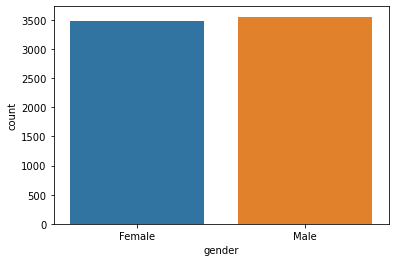

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
print('Count of Gender')
print("="*30)
print("Total number of Gender : ",df['gender'].nunique())
print("="*30)
stop_counts = df['gender'].value_counts()
print('Gender Counts :'"\n",stop_counts)
print("="*30)
sns.countplot(x="gender", data=df)

In [138]:
df.groupby('gender').count()[['Churn']]

,Churn
gender,
Female,3488
Male,3555


In [139]:
checkGender_Female=np.where((df['gender']=="Female") & (df['Churn']=="Yes"))
checkGender_Female=df.iloc[checkGender_Female]
checkGender_Female.shape

(939, 21)

In [140]:
checkGender_Male=np.where((df['gender']=="Male") & (df['Churn']=="Yes"))
checkGender_Male=df.iloc[checkGender_Male]
checkGender_Male.shape

(930, 21)

<AxesSubplot:xlabel='gender', ylabel='count'>

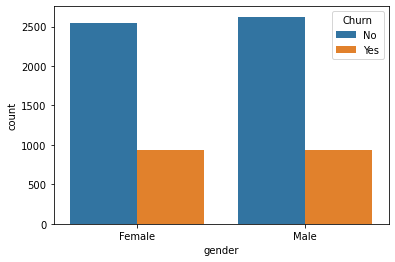

In [141]:
sns.countplot(x="gender",hue="Churn",data=df)

- We see that total number of males are 3555 and females are 3488 
- <strong>Out of 3555, 930 male customers were churned and 939 female customers were churned out of 3488</strong>
- So we conclude that both male and female are equally churned

Count of SeniorCitizen
Total number of SeniorCitizen :  2
SeniorCitizen Counts :
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64


<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

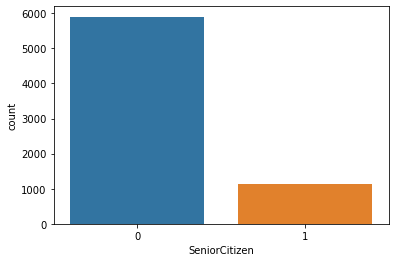

In [142]:
print('Count of SeniorCitizen')
print("="*30)
print("Total number of SeniorCitizen : ",df['SeniorCitizen'].nunique())
print("="*30)
stop_counts = df['SeniorCitizen'].value_counts()
print('SeniorCitizen Counts :'"\n",stop_counts)
print("="*30)
sns.countplot(x="SeniorCitizen", data=df)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

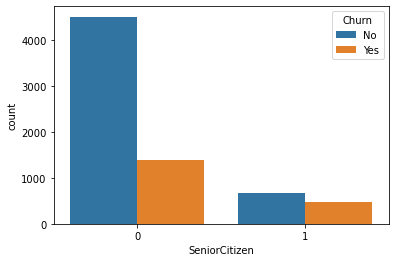

In [143]:
sns.countplot(x="SeniorCitizen",hue="Churn",data=df)

- Most of the senior citizen are churned, Company needs to look into the reason for the same

In [144]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [145]:
set(df['Partner'])

{'No', 'Yes'}

Count of Partner
Total number of Partner :  2
Partner Counts :
 No     3641
Yes    3402
Name: Partner, dtype: int64


<AxesSubplot:xlabel='Partner', ylabel='count'>

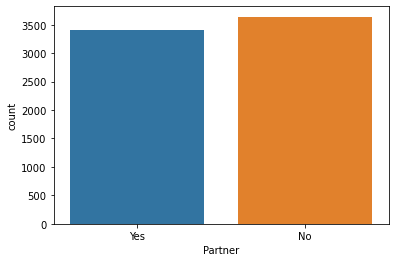

In [146]:
print('Count of Partner')
print("="*30)
print("Total number of Partner : ",df['Partner'].nunique())
print("="*30)
stop_counts = df['Partner'].value_counts()
print('Partner Counts :'"\n",stop_counts)
print("="*30)
sns.countplot(x="Partner", data=df)

We see that customers having partner are less in number than customers having no partner

<AxesSubplot:xlabel='Partner', ylabel='count'>

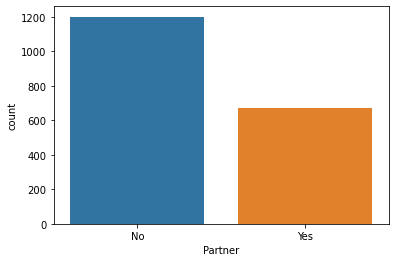

In [147]:
sns.countplot(x="Partner",data=df.loc[df["Churn"]=="Yes"])

We see that customer having no partner are not churned and customer having partner are churned

Count of Dependents
Total number of Dependents :  2
Dependents Counts :
 No     4933
Yes    2110
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

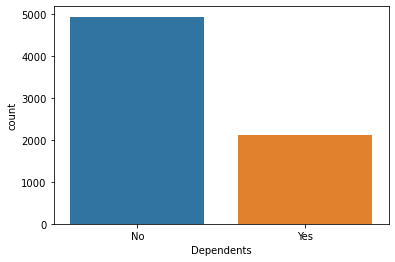

In [148]:
print('Count of Dependents')
print("="*30)
print("Total number of Dependents : ",df['Dependents'].nunique())
print("="*30)
stop_counts = df['Dependents'].value_counts()
print('Dependents Counts :'"\n",stop_counts)
print("="*30)
sns.countplot(x="Dependents", data=df)

There are more customers with no dependents and less customers with dependents

In [149]:
checkDependents_Yes=np.where((df['Dependents']=="Yes") & (df['Churn']=="Yes"))
checkDependents_Yes=df.iloc[checkDependents_Yes]
checkDependents_Yes.shape

(326, 21)

In [150]:
checkDependents_No=np.where((df['Dependents']=="No") & (df['Churn']=="Yes"))
checkDependents_No=df.iloc[checkDependents_No]
checkDependents_No.shape

(1543, 21)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

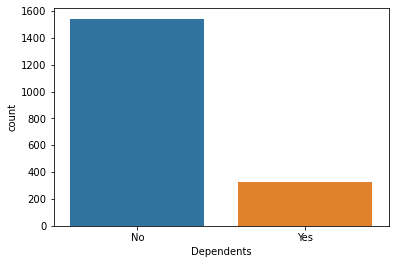

In [151]:
sns.countplot(x="Dependents",data=df.loc[df["Churn"]=="Yes"])

- From above analysis on Dependents we see that customers having No Dependents are 4933 and with Dependents are 2110
- We see that 326 customers haing dependents were churned out of 2110. (15%)
- We also notice that 1543 out of 4933 customers were churned.(31%)

Count of number of months the customer has stayed with the company (Tenure)
Total number of Tenure :  73
Tenure Counts :
 1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


<AxesSubplot:xlabel='tenure', ylabel='Count'>

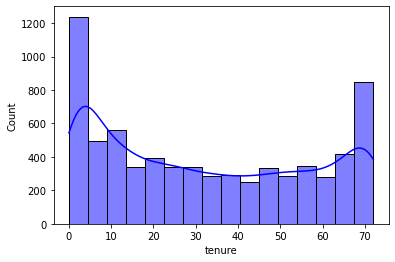

In [152]:
print('Count of number of months the customer has stayed with the company (Tenure)')
print("="*30)
print("Total number of Tenure : ",df['tenure'].nunique())
print("="*30)
counts = df['tenure'].value_counts()
print('Tenure Counts :'"\n",counts)
print("="*30)
sns.histplot(df['tenure'],color="blue",kde=True,stat="count")

We see that number of months the customers associated with the company ranges between 0 to 55 and there are few customers who are above third quantile which ranges above 55

Count of PhoneService
Total number of PhoneService :  2
PhoneService Counts :
 Yes    6361
No      682
Name: PhoneService, dtype: int64


<AxesSubplot:xlabel='PhoneService', ylabel='count'>

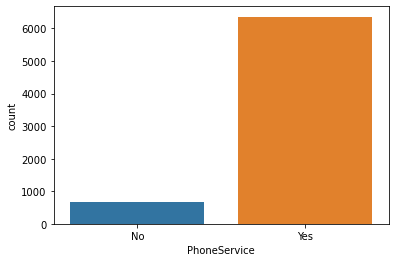

In [153]:
print('Count of PhoneService')
print("="*30)
print("Total number of PhoneService : ",df['PhoneService'].nunique())
print("="*30)
counts = df['PhoneService'].value_counts()
print('PhoneService Counts :'"\n",counts)
print("="*30)
sns.countplot(x="PhoneService", data=df)

In [154]:
checkPhoneService_No=np.where((df['PhoneService']=="No") & (df['Churn']=="Yes"))
checkPhoneService_No=df.iloc[checkPhoneService_No]
checkPhoneService_No.shape

(170, 21)

In [155]:
checkPhoneService_Yes=np.where((df['PhoneService']=="Yes") & (df['Churn']=="Yes"))
checkPhoneService_Yes=df.iloc[checkPhoneService_Yes]
checkPhoneService_Yes.shape

(1699, 21)

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

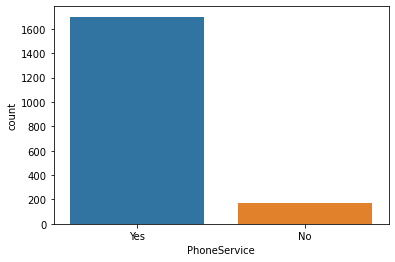

In [156]:
sns.countplot(x="PhoneService",data=df.loc[df["Churn"]=="Yes"])

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

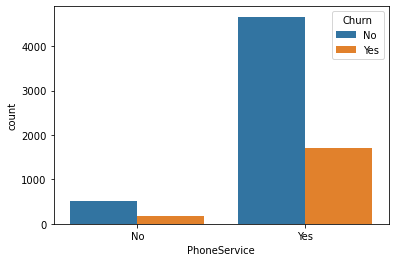

In [157]:
sns.countplot(x="PhoneService",hue="Churn",data=df)

- Maximum customers who were Churned were using Phone Service.
- In our dataset also, 6361 customers were using Phone Service and 682 were not using PhoneService.
- Out of 6361 using Phone Service,1699 customers were churned.
- Out of 682 not  Phone Service,170 customers were churned.

Count of MultipleLines
Total number of MultipleLines :  3
MultipleLines Counts :
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

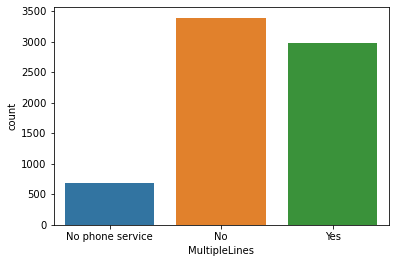

In [158]:
print('Count of MultipleLines')
print("="*30)
print("Total number of MultipleLines : ",df['MultipleLines'].nunique())
print("="*30)
counts = df['MultipleLines'].value_counts()
print('MultipleLines Counts :'"\n",counts)
print("="*30)
sns.countplot(x="MultipleLines", data=df)

In [159]:
checkMultipleLines_No=np.where((df['MultipleLines']=="No") & (df['Churn']=="Yes"))
checkMultipleLines_No=df.iloc[checkMultipleLines_No]
checkMultipleLines_No.shape

(849, 21)

In [160]:
checkMultipleLines_Yes=np.where((df['MultipleLines']=="Yes") & (df['Churn']=="Yes"))
checkMultipleLines_Yes=df.iloc[checkMultipleLines_Yes]
checkMultipleLines_Yes.shape

(850, 21)

In [161]:
checkMultipleLines_NoPS=np.where((df['MultipleLines']=="No phone service") & (df['Churn']=="Yes"))
checkMultipleLines_NoPS=df.iloc[checkMultipleLines_NoPS]
checkMultipleLines_NoPS.shape

(170, 21)

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

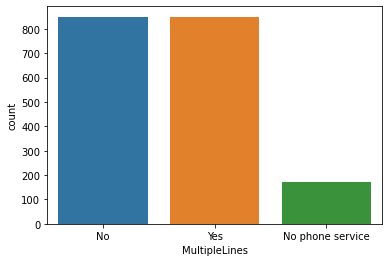

In [162]:
sns.countplot(x="MultipleLines",data=df.loc[df["Churn"]=="Yes"])

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

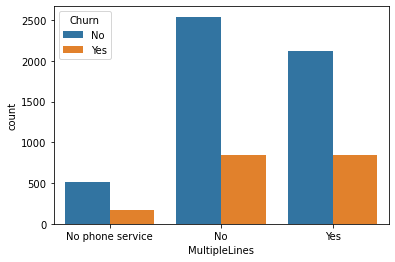

In [163]:
sns.countplot(x="MultipleLines",hue="Churn",data=df)

- Count of Multiple Lines in thw while Dataset where Customers were churned are 2971, not churned 3390 and No Phone service is 682
- We see that the customers who have not opted for MultipleLines services is 849 out of 3390 (25%)
- Also the customers who have opted for MultipleLines service are 850 out of 2971 (28%)
- In our whole dataset we observe that there are slightly more customers who got opted for MultipleLines services churned out.

Count of InternetService
Total number of InternetService :  3
InternetService Counts :
 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


<AxesSubplot:xlabel='InternetService', ylabel='count'>

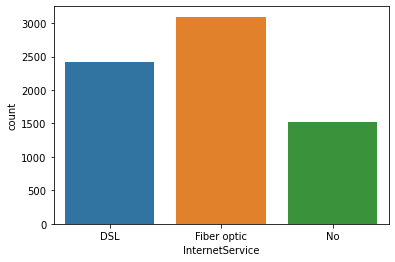

In [164]:
print('Count of InternetService')
print("="*30)
print("Total number of InternetService : ",df['InternetService'].nunique())
print("="*30)
counts = df['InternetService'].value_counts()
print('InternetService Counts :'"\n",counts)
print("="*30)
sns.countplot(x="InternetService", data=df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

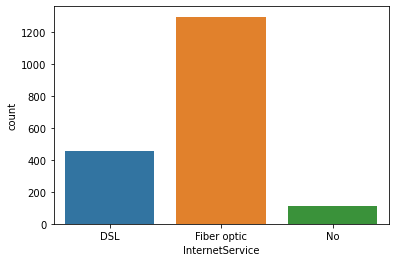

In [165]:
sns.countplot(x="InternetService",data=df.loc[df["Churn"]=="Yes"])

- There are two types of Internet service provided, DSL and Fiber Optic. Anf few customers didnt use any Internet Service.
- We see that customer using Fiber optic are more churned(more than 1200), So compnay will have to think if there is any issue with Fiber optic or not.

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

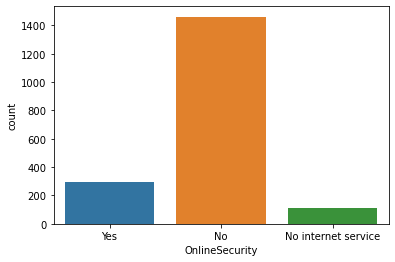

In [166]:
sns.countplot(x="OnlineSecurity",data=df.loc[df["Churn"]=="Yes"])

- More than 1400 people who are not using Online security got churned out, Company needs to talk to these customers and try convinving them to use OnlineSecurity

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

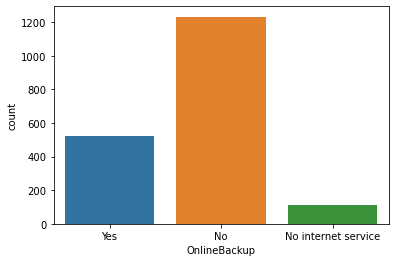

In [167]:
sns.countplot(x="OnlineBackup",data=df.loc[df["Churn"]=="Yes"])

- More than 1200 people who are not using Online Backup got churned out, Company needs to talk to these customers and try convinving them to use OnlineBackup

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

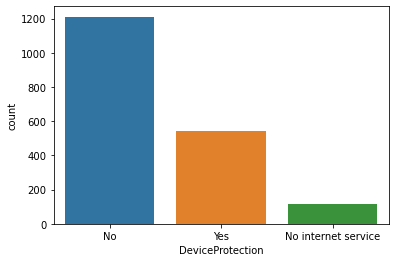

In [168]:
sns.countplot(x="DeviceProtection",data=df.loc[df["Churn"]=="Yes"])

- Close to 1200 people who have not signed up for Device Protection service got churned out, Company needs to talk to these customers and try convinving them to use Device protection service

In [169]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

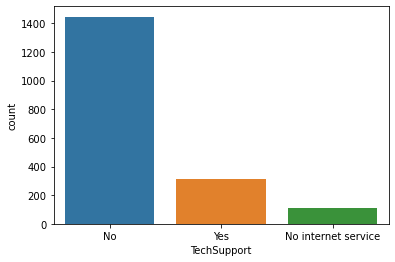

In [170]:
sns.countplot(x="TechSupport",data=df.loc[df["Churn"]=="Yes"])

- More than 1400 people who have not signed up for TechSupport service got churned out, Company needs to talk to these customers and try convinving them to use TechSupport service

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

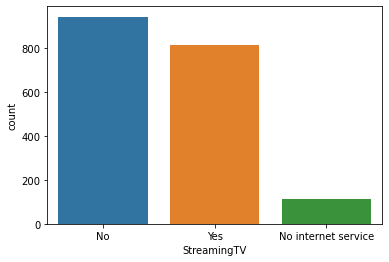

In [171]:
sns.countplot(x="StreamingTV",data=df.loc[df["Churn"]=="Yes"])

- Customer who dont use StreamingTV are more churned but there is not much difference between the customers using StreamingTV.
- There are few customers who got churned because they dont use StreamingTV because they have not opted for Internet service.

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

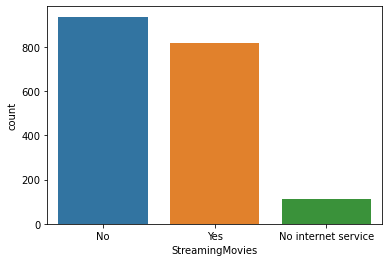

In [172]:
sns.countplot(x="StreamingMovies",data=df.loc[df["Churn"]=="Yes"])

- Customer who dont use StreamingMovies are more churned but there is not much difference between the customers using StreamingMovies.
- There are few customers who got churned because they dont use StreamingMovies because they have not opted for Internet service.

<AxesSubplot:xlabel='Contract', ylabel='count'>

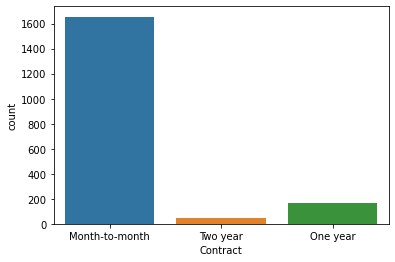

In [173]:
sns.countplot(x="Contract",data=df.loc[df["Churn"]=="Yes"])

- Customers who have monthly contract are more churned out
- Marketing executives of the company should try to convince them to use One year or Two year contract to avoid quick Churn of their customers

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

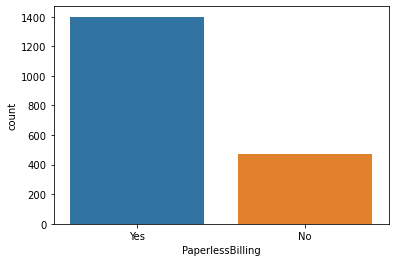

In [174]:
sns.countplot(x="PaperlessBilling",data=df.loc[df["Churn"]=="Yes"])

- The above graph shows that customers who are using Paperless Bills are more in number who got churned out.

Count of PaymentMethod
Total number of PaymentMethod :  4
PaymentMethod Counts :
 Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

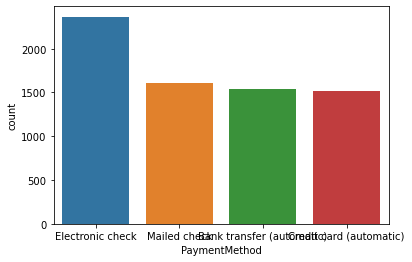

In [175]:
print('Count of PaymentMethod')
print("="*30)
print("Total number of PaymentMethod : ",df['PaymentMethod'].nunique())
print("="*30)
counts = df['PaymentMethod'].value_counts()
print('PaymentMethod Counts :'"\n",counts)
print("="*30)
sns.countplot(x="PaymentMethod", data=df)

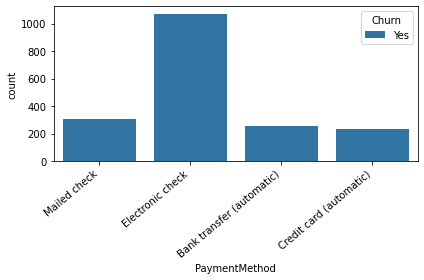

In [176]:
ax = sns.countplot(x="PaymentMethod", data=df.loc[df["Churn"]=="Yes"],hue='Churn')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

- We see that there are four modes of payments, Mailed check, Electronic check, Bank transfer(automatic) and Credit card(automatic)

- Customers churned are more where they are using Electronic check as a medium of payments. There can be multiple issues using this service, due to which more than 50% of churn are the customers using Electronic check.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

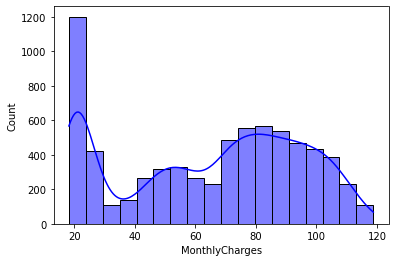

In [177]:
sns.histplot(df['MonthlyCharges'],color="blue",kde=True,stat="count")

In [178]:
monthlyCharges=np.where((df['MonthlyCharges']>=18) &(df['MonthlyCharges']<=119) & (df['Churn']=="Yes"))
monthlyCharges=df.iloc[monthlyCharges]
monthlyCharges.shape

(1869, 21)

In [179]:
monthlyCharges_ChNo=np.where((df['MonthlyCharges']>=18) &(df['MonthlyCharges']<=119) & (df['Churn']=="No"))
monthlyCharges_ChNo=df.iloc[monthlyCharges_ChNo]
monthlyCharges_ChNo.shape

(5174, 21)

In [180]:
df.shape

(7043, 21)

- We see that 1869 out of 7043 got churned out because of Monthly Charges but it is not the issues with majority of the customers as 5174 out of 7043 didnt churned out due to Monthly charges.(73%)

- Also if we notice these numbers are equal to the customers churned and not churned

In [181]:
totalCharges=np.where((df['TotalCharges']>=18) &(df['TotalCharges']<=8685) & (df['Churn']=="Yes"))
totalCharges=df.iloc[totalCharges]
totalCharges.shape

(1869, 21)

In [182]:
totalCharges_ChNo=np.where((df['TotalCharges']>=18) &(df['TotalCharges']<=8685) & (df['Churn']=="No"))
totalCharges_ChNo=df.iloc[totalCharges_ChNo]
totalCharges_ChNo.shape

(5174, 21)

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

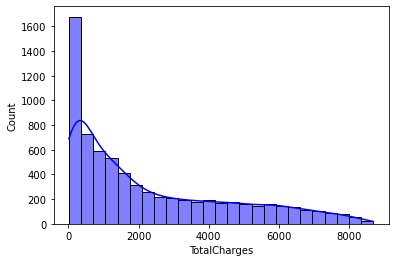

In [183]:
sns.histplot(df['TotalCharges'],color="blue",kde=True,stat="count")

- We see that 1869 out of 7043 got churned out because of Monthly Charges but it is not the issues with majority of the customers as 5163 out of 7043 didnt churned out due to Monthly charges.(73%)

- Also if we notice these numbers are equal to the customers churned and not churned

Count of Churn
Total number of Churn :  2
Churn Counts :
 No     5174
Yes    1869
Name: Churn, dtype: int64


<AxesSubplot:xlabel='Churn', ylabel='count'>

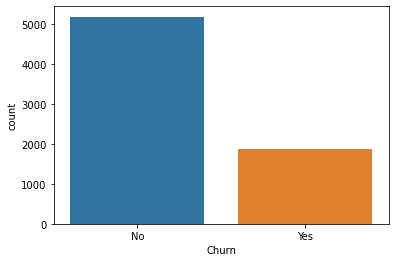

In [184]:
print('Count of Churn')
print("="*30)
print("Total number of Churn : ",df['Churn'].nunique())
print("="*30)
counts = df['Churn'].value_counts()
print('Churn Counts :'"\n",counts)
print("="*30)
sns.countplot(x="Churn", data=df)

We see that data is imbalanced as there are 5174 who were not churned and 1869 were churned, and hence auc roc curve should be the metric going further.

Now, as noticed above, we will drop customerID as it has no significance in our dataset.

In [185]:
df.drop('customerID',axis=1,inplace=True)

In [186]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=="object":
        df[col]=le.fit_transform(df[col])

In [187]:
df.tail(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.6,1
7042,1,0,0,0,66,1,0,1,2,0,2,2,2,2,2,1,0,105.65,6844.5,0


We see that we have successfully converted all the datatypes.

# HeatMap

<AxesSubplot:>

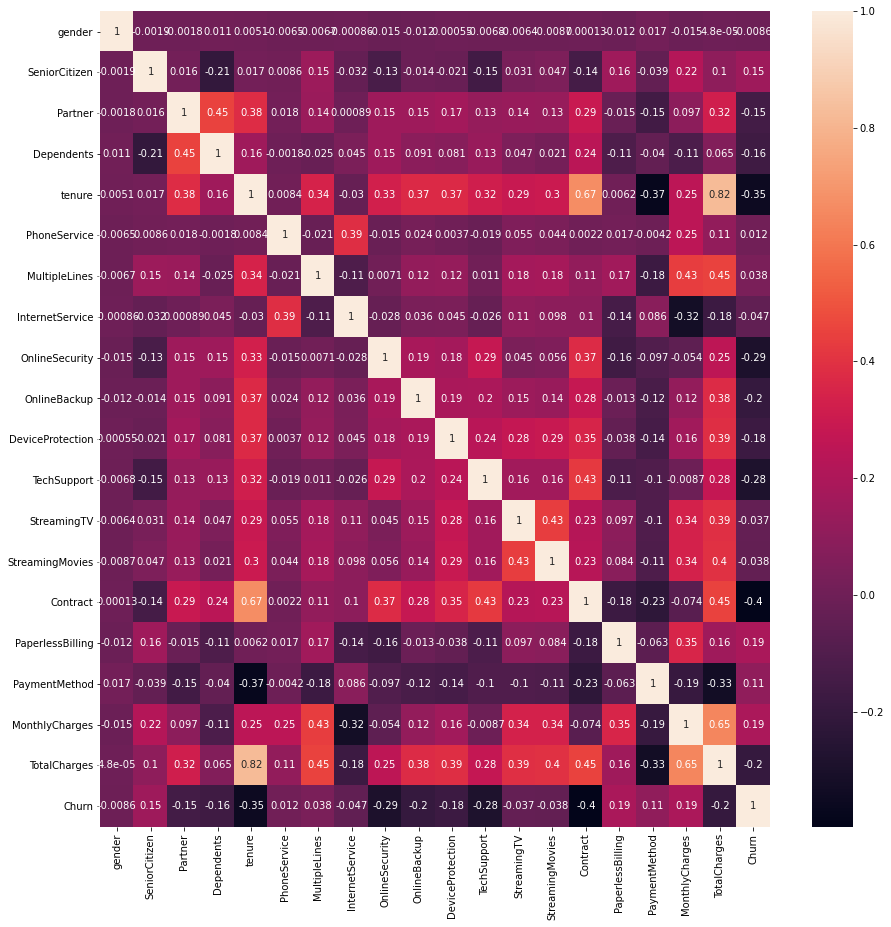

In [188]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

- Total Charges are Monthly Charges are coreelated
- Tenure and Total Charges are correlated
- Contract and Tenure and correlated

# BoxPlot

In [189]:
dataToPlot=df.drop(columns= ['Churn'])
dataToPlot.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50


In [190]:
targetToPlot=df.loc[:, df.columns == 'Churn']
targetToPlot.head(2)

,Churn
0,0
1,0


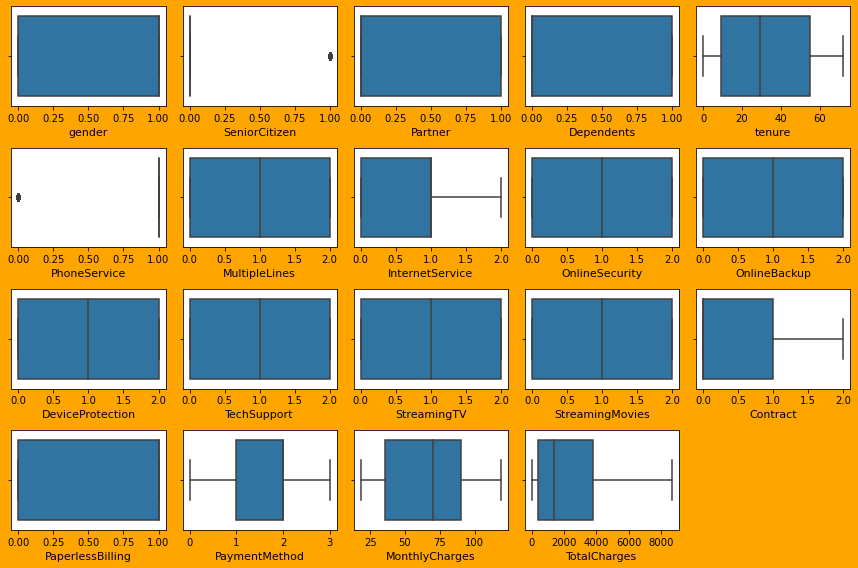

In [195]:
#Lets see data distribution now using Boxplot
plt.figure(figsize=(12,8),facecolor='orange')
graph=1

for column in dataToPlot:
    
    if graph<=20:
        ax=plt.subplot(4,5,graph)        
        sns.boxplot(dataToPlot[column])
        plt.xlabel(column,fontsize=11)
        
    graph+=1   
    
plt.tight_layout()

There seems to be few outliers but lets use zscore method to find the outliers accurately

In [192]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(7043, 20)
(6361, 20)


In [194]:
lossPercent=((7043-6361)/7043)*100
lossPercent

9.683373562402386

The percentage of data deletion is 9.68% which is more than 5% of our acceptable range, Hence we are not deleting any data

# Skewness

In [196]:
features=df.drop(columns=['Churn'])
target=df[["Churn"]]

In [197]:
features.shape, target.shape

((7043, 19), (7043, 1))

In [198]:
#Check Data Skewness
skew_df=pd.DataFrame({'Skewness':features.skew()}) 
skew_df

,Skewness
gender,-0.019031
SeniorCitizen,1.833633
Partner,0.067922
Dependents,0.875199
tenure,0.239540
PhoneService,-2.727153
MultipleLines,0.118719
InternetService,0.205423
OnlineSecurity,0.416985
OnlineBackup,0.182930


In [199]:
print("Out of",len(features.skew()),"features",len(features.skew().loc[abs(features.skew())>0.5]) ,"are skewed")

Out of 19 features 5 are skewed


# Log1P Transformation

In [200]:
for index in features.skew().index:
    if features.skew().loc[index]>0.5:
        features[index]=np.log1p(features[index])
    if features.skew().loc[index]<-0.5:
        features[index]=np.square(features[index])
print(features.skew())
print("Out of",len(features.skew()),"features",len(features.skew().loc[abs(features.skew())>0.5]) 
      ,"and we have improved the skewness to much extent")

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.434281
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges       -0.354655
dtype: float64
Out of 19 features 3 and we have improved the skewness to much extent


# Feature Importance

In [201]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
feature_rf = RandomForestRegressor()
feature_rf.fit(features,target)
print(feature_rf.feature_importances_)

[0.02457161 0.01889475 0.02008204 0.0173718  0.11516042 0.00360901
 0.01681228 0.01598602 0.03685918 0.01744352 0.01509026 0.02243379
 0.01045627 0.01134701 0.16913918 0.02282928 0.04459924 0.21540704
 0.2019073 ]


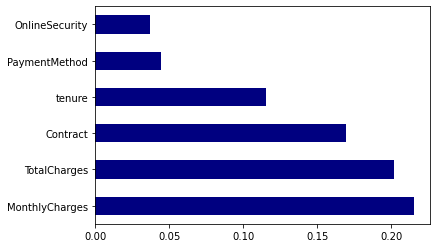

In [202]:
#plot graph of feature importances for better visualization
featureImportance = pd.Series(feature_rf.feature_importances_, index=features.columns)
featureImportance.nlargest(6).plot(kind='barh',color="navy") # Lets plot for 8 features 
plt.show()

- Above is the six most important features of dataset.
- Monthly Charges and Total Charges are the most important feature followed by Contract and tenure
- We should also notice Payment method where the maximum people got churned out during our EDA beacuse of Electronic Payment issues. This is showing in our best feature selection as well.

In [210]:
# Fit and Transform the target too.
le.fit(target)
target=le.transform(target)
target

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

# Standard Scaler

In [207]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(df)

In [208]:
X_vif=df
X_vif.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0


In [209]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=X_vif.columns

# Let's check the values now
vif

,vif,features
0,1.001963,gender
1,1.152162,SeniorCitizen
2,1.461056,Partner
3,1.383210,Dependents
4,7.224831,tenure
5,1.633920,PhoneService
6,1.395799,MultipleLines
7,1.836907,InternetService
8,1.277992,OnlineSecurity
9,1.221875,OnlineBackup


We see Multicollinearity issue in Total Charges but this is an important feature also, Hence we will ignore this as of now and proceed with Model Building

# Model Building

In [379]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve,roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [380]:
#Define a function to get the best auc_roc score and use the same function everywhere

def get_aucroc_score(model,features,target):
    max_aucroc_score=0
    for i in range(40,100):
        x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state=i,stratify=target)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        model.fit(x_train,y_train)
        pred_test = model.predict(x_test)
        aucroc=roc_auc_score(y_test,pred_test)
        print("At",i," aucroc score is ",aucroc)
        if aucroc>max_aucroc_score:
            max_aucroc_score=aucroc
            final_i=i
    print("At",final_i,"max roc auc score is :",max_aucroc_score)
    return final_i

# Logistic Regression

In [381]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()

In [382]:
get_aucroc_score(lgr,features,target)

At 40  aucroc score is  0.756715492521119
At 41  aucroc score is  0.7512555219716346
At 42  aucroc score is  0.7598387971789505
At 43  aucroc score is  0.7788925056188483
At 44  aucroc score is  0.7859477124183006
At 45  aucroc score is  0.7583107287710869
At 46  aucroc score is  0.7501433775091063
At 47  aucroc score is  0.7560076468004857
At 48  aucroc score is  0.7560864398460306
At 49  aucroc score is  0.7462786432095895
At 50  aucroc score is  0.7348756103231807
At 51  aucroc score is  0.767006380945
At 52  aucroc score is  0.7715001679196053
At 53  aucroc score is  0.7663101604278075
At 54  aucroc score is  0.7535250200211836
At 55  aucroc score is  0.7577940530625954
At 56  aucroc score is  0.7520305355343719
At 57  aucroc score is  0.7513678989382314
At 58  aucroc score is  0.7580523909168412
At 59  aucroc score is  0.7578276369836473
At 60  aucroc score is  0.7553450102043453
At 61  aucroc score is  0.7572321682296107
At 62  aucroc score is  0.7393358133767342
At 63  aucroc sc

44

In [383]:
x_train, x_test, y_train, y_test = train_test_split(features,target,random_state=44,test_size=0.20,stratify=target)

In [384]:
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
lgr.fit(x_train,y_train)
pred_train=lgr.predict(x_train)
pred_test=lgr.predict(x_test)
rocauc_scoreLR=roc_auc_score(y_test,pred_test)
rocauc_scoreLR

0.7904079154718542

In [385]:
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV, cross_val_score
#
# Create an instance of Pipeline
#
pipeline = make_pipeline(StandardScaler(), LogisticRegression() )
#
# Pass instance of pipeline and training and test data set
# cv=2 represents the StratifiedKFold with 2 folds
#
scores = cross_val_score(pipeline, X=x_train, y=y_train, cv=5, n_jobs=1) 

print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))
clfLR_cvScore=(np.mean(scores))
clfLR_cvScore

Cross Validation accuracy: 0.782 +/- 0.028


0.7818374272078462

In [386]:
from sklearn.metrics import classification_report, confusion_matrix

# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.91      0.79      0.85      1035
           1       0.58      0.79      0.67       374

    accuracy                           0.79      1409
   macro avg       0.74      0.79      0.76      1409
weighted avg       0.82      0.79      0.80      1409

Confusion Matrix
 [[817 218]
 [ 78 296]]


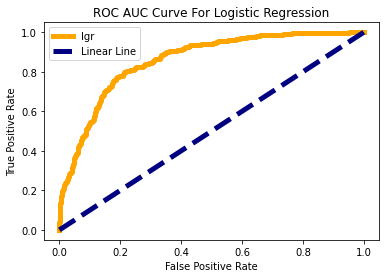

In [387]:
fpr, tpr, thresholds = roc_curve(y_test,lgr.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,lgr.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='lgr',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Logistic Regression")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [388]:
clfLR_data = {'Model': ['Logistic Regression'],            
             'ROC_AUC Score': rocauc_scoreLR,
             'CV Score': clfLR_cvScore
            }

clf_LR_df = pd.DataFrame(clfLR_data)  
clf_LR_df

,Model,ROC_AUC Score,CV Score
0,Logistic Regression,0.790408,0.781837


# KNeighborsClassifier 

In [389]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier()

In [390]:
get_aucroc_score(knn,features,target)

At 40  aucroc score is  0.7177310186261594
At 41  aucroc score is  0.7187424113255315
At 42  aucroc score is  0.7148776770260147
At 43  aucroc score is  0.7209331163295357
At 44  aucroc score is  0.72442713580821
At 45  aucroc score is  0.7148440931049627
At 46  aucroc score is  0.6979022966235242
At 47  aucroc score is  0.7070810405848768
At 48  aucroc score is  0.7091593686222842
At 49  aucroc score is  0.6960487225193107
At 50  aucroc score is  0.6861285489162726
At 51  aucroc score is  0.6890723087654034
At 52  aucroc score is  0.736751143145005
At 53  aucroc score is  0.7151476400837016
At 54  aucroc score is  0.7004637164483712
At 55  aucroc score is  0.7385039654860628
At 56  aucroc score is  0.698048257511173
At 57  aucroc score is  0.7041036968146944
At 58  aucroc score is  0.7164057454338785
At 59  aucroc score is  0.6973068278694877
At 60  aucroc score is  0.7319654343951019
At 61  aucroc score is  0.7042948668268361
At 62  aucroc score is  0.7011043943269006
At 63  aucroc s

55

In [391]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state=55,stratify=target)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
knn.fit(x_train,y_train)
pred_train=knn.predict(x_train)
pred_test=knn.predict(x_test)
rocauc_scoreKNN=roc_auc_score(y_test,pred_test)
rocauc_scoreKNN

0.7386499263737115

In [394]:
clfKNN_cvScore=cross_val_score(knn,features,target,cv=5,scoring='roc_auc').mean()
clfKNN_cvScore

0.7770198819637127

In [395]:
# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.71      0.79      1035
           1       0.49      0.77      0.60       374

    accuracy                           0.72      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.72      0.74      1409

Confusion Matrix
 [[732 303]
 [ 86 288]]


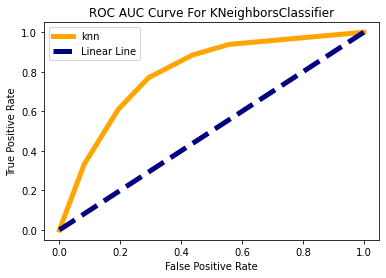

In [396]:
fpr, tpr, thresholds = roc_curve(y_test,knn.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,knn.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='knn',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For KNeighborsClassifier")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [397]:
clfKNN_data = {'Model': ['KNeighborsClassifier'],            
             'ROC_AUC Score': rocauc_scoreKNN,
             'CV Score': clfKNN_cvScore
            }

clf_KNN_df = pd.DataFrame(clfKNN_data)  
clf_KNN_df

,Model,ROC_AUC Score,CV Score
0,KNeighborsClassifier,0.73865,0.77702


# Decision Tree Classifier

In [398]:
from sklearn.tree import DecisionTreeClassifier

In [399]:
# creating model
decTree = DecisionTreeClassifier()
params={'criterion':['entropy','ginni'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]
        }
params

{'criterion': ['entropy', 'ginni'],
 'max_depth': [10, 15],
 'min_samples_split': [10, 11],
 'min_samples_leaf': [5, 6]}

In [273]:
grid_Search=GridSearchCV(estimator=decTree,param_grid=params,cv=5,n_jobs=-1)

grid_Search.fit(x_train,y_train)
print("Best_Params_",grid_Search.best_params_)

Best_Params_ {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11}


In [400]:
decTree=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=5,max_depth=15,min_samples_split=11)
get_aucroc_score(decTree,features,target)

At 40  aucroc score is  0.7019142834999613
At 41  aucroc score is  0.6813441318556408
At 42  aucroc score is  0.6927471647420496
At 43  aucroc score is  0.6879162468676534
At 44  aucroc score is  0.6878826629466016
At 45  aucroc score is  0.6967578599292155
At 46  aucroc score is  0.6943088170709654
At 47  aucroc score is  0.6760301221938052
At 48  aucroc score is  0.6867369345630214
At 49  aucroc score is  0.6677956030897207
At 50  aucroc score is  0.6792658038182334
At 51  aucroc score is  0.6853212431217546
At 52  aucroc score is  0.7170812989227312
At 53  aucroc score is  0.6851416983130538
At 54  aucroc score is  0.6975444986953938
At 55  aucroc score is  0.6664470794905577
At 56  aucroc score is  0.6958252602753883
At 57  aucroc score is  0.6786031672220931
At 58  aucroc score is  0.7099808829987858
At 59  aucroc score is  0.6781420341522644
At 60  aucroc score is  0.6891743522178304
At 61  aucroc score is  0.7216086698183886
At 62  aucroc score is  0.6712108295228499
At 63  aucr

61

In [401]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state=66,stratify=target)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
decTree.fit(x_train,y_train)
pred_train=decTree.predict(x_train)
pred_test=decTree.predict(x_test)
rocauc_scoreTree=roc_auc_score(y_test,pred_test)
rocauc_scoreTree

0.7033299749412282

In [402]:
clfTree_cvScore=cross_val_score(decTree,features,target,cv=5,scoring='roc_auc').mean()
clfTree_cvScore

0.7436273911278781

In [403]:
# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1035
           1       0.53      0.60      0.56       374

    accuracy                           0.75      1409
   macro avg       0.69      0.70      0.69      1409
weighted avg       0.76      0.75      0.76      1409

Confusion Matrix
 [[836 199]
 [150 224]]


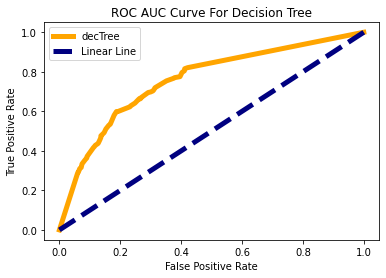

In [404]:
fpr, tpr, thresholds = roc_curve(y_test,decTree.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,decTree.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='decTree',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Decision Tree")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [405]:
clfTree_data = {'Model': ['Decison Tree Classifier'],            
             'ROC_AUC Score': rocauc_scoreTree,
             'CV Score': clfTree_cvScore
            }

clf_Tree_df = pd.DataFrame(clfTree_data)  
clf_Tree_df

,Model,ROC_AUC Score,CV Score
0,Decison Tree Classifier,0.70333,0.743627


# Naive Bye Classification

In [406]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
get_aucroc_score(nb,features,target)

At 40  aucroc score is  0.7522888733886176
At 41  aucroc score is  0.7453796274768142
At 42  aucroc score is  0.7442674830142861
At 43  aucroc score is  0.7608721485959338
At 44  aucroc score is  0.7636583223539745
At 45  aucroc score is  0.7526260042884083
At 46  aucroc score is  0.7447505748017258
At 47  aucroc score is  0.717001214187915
At 48  aucroc score is  0.7480534242682579
At 49  aucroc score is  0.7297075615489939
At 50  aucroc score is  0.7209783254540287
At 51  aucroc score is  0.7461662662429926
At 52  aucroc score is  0.7501769614301583
At 53  aucroc score is  0.7558281019917849
At 54  aucroc score is  0.7430429615851611
At 55  aucroc score is  0.7399984499728745
At 56  aucroc score is  0.7291908858405022
At 57  aucroc score is  0.7240564209873672
At 58  aucroc score is  0.7448965356893745
At 59  aucroc score is  0.7272133095662507
At 60  aucroc score is  0.7603554728874421
At 61  aucroc score is  0.750468883205456
At 62  aucroc score is  0.7442338990932342
At 63  aucroc

87

In [407]:
x_train, x_test, y_train, y_test = train_test_split(features,target,random_state=87,test_size=0.20,stratify=target)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
nb.fit(x_train,y_train)
pred_train=nb.predict(x_train)
pred_test=nb.predict(x_test)
rocauc_scoreNB=roc_auc_score(y_test,pred_test)
rocauc_scoreNB

0.7734997029114676

In [412]:
clfNB_cvScore=cross_val_score(nb,features,target,cv=5).mean()
clfNB_cvScore

0.7587687108845731

In [413]:
# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.91      0.76      0.83      1035
           1       0.54      0.79      0.64       374

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.77      0.78      1409

Confusion Matrix
 [[782 253]
 [ 78 296]]


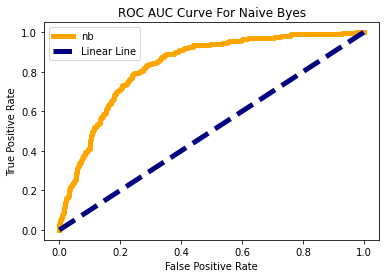

In [414]:
fpr, tpr, thresholds = roc_curve(y_test,nb.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,nb.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='nb',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Naive Byes")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [415]:
clfNB_data = {'Model': ['Gaussian NB'],            
             'ROC_AUC Score': rocauc_scoreNB,
             'CV Score': clfNB_cvScore
            }

clf_NB_df = pd.DataFrame(clfNB_data)  
clf_NB_df

,Model,ROC_AUC Score,CV Score
0,Gaussian NB,0.7735,0.758769


# Random Forest Classifier

In [416]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
clf_rf = RandomForestClassifier()
params={'n_estimators':[100,150],
        'criterion':['entropy','ginni'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]
        }
params

{'n_estimators': [100, 150],
 'criterion': ['entropy', 'ginni'],
 'max_depth': [10, 15],
 'min_samples_split': [10, 11],
 'min_samples_leaf': [5, 6]}

In [314]:
grd=GridSearchCV(clf_rf,param_grid=params)
grd.fit(x_train,y_train)
print("Best_Params_",grd.best_params_)

Best_Params_ {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [417]:
forest=RandomForestClassifier(criterion='entropy', max_depth= 15, min_samples_leaf= 5,min_samples_split=10, n_estimators=100)

In [340]:
get_aucroc_score(forest,features,target)

At 40  aucroc score is  0.7420722114764667
At 41  aucroc score is  0.728577519736103
At 42  aucroc score is  0.7584892916662354
At 43  aucroc score is  0.7568985250890929
At 44  aucroc score is  0.726773706775695
At 45  aucroc score is  0.7551935788479697
At 46  aucroc score is  0.7348927798647239
At 47  aucroc score is  0.7260830965909091
At 48  aucroc score is  0.7494407158836688
At 49  aucroc score is  0.73590311755514
At 50  aucroc score is  0.7355685899845466
At 51  aucroc score is  0.7241455912508544
At 52  aucroc score is  0.7478996416136054
At 53  aucroc score is  0.7565927820403524
At 54  aucroc score is  0.7250133879837697
At 55  aucroc score is  0.7418059753665207
At 56  aucroc score is  0.7662112993882431
At 57  aucroc score is  0.7537502881881292
At 58  aucroc score is  0.7345952476842529
At 59  aucroc score is  0.7395550393612893
At 60  aucroc score is  0.7351933061142194
At 61  aucroc score is  0.7526776934962776
At 62  aucroc score is  0.7512512033289513
At 63  aucroc s

56

In [418]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state=56)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
forest.fit(x_train,y_train)
pred_test=forest.predict(x_test)
rocauc_scoreForest=roc_auc_score(y_test,pred_test)
rocauc_scoreForest

0.7630477087581644

In [421]:
clfForest_cvScore=cross_val_score(forest,features,target,cv=5).mean()
clfForest_cvScore

0.7993758669914188

In [422]:
# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1036
           1       0.61      0.69      0.64       373

    accuracy                           0.80      1409
   macro avg       0.74      0.76      0.75      1409
weighted avg       0.81      0.80      0.80      1409

Confusion Matrix
 [[870 166]
 [117 256]]


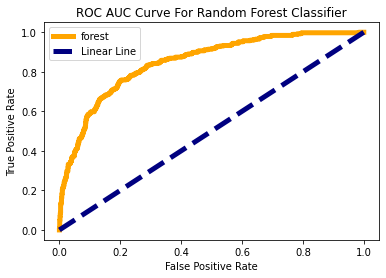

In [423]:
fpr, tpr, thresholds = roc_curve(y_test,forest.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,forest.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='forest',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Random Forest Classifier")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [424]:
clfForest_data = {'Model': ['RandomForestClassifier'],            
             'ROC_AUC Score': rocauc_scoreForest,
             'CV Score': clfForest_cvScore
            }

clf_Forest_df = pd.DataFrame(clfForest_data)  
clf_Forest_df

,Model,ROC_AUC Score,CV Score
0,RandomForestClassifier,0.763048,0.799376


# Gradient Boost Classifier

In [443]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier()

In [446]:
params={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,250,500]
           }
params

{'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [10, 100, 250, 500]}

In [447]:
clf = GridSearchCV(gb_clf, params, cv=5,scoring="roc_auc")
clf.fit(features,target)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [448]:
gb_clf=GradientBoostingClassifier(learning_rate=0.01,n_estimators=500)
get_aucroc_score(gb_clf,features,target)

At 40  aucroc score is  0.7568394946911571
At 41  aucroc score is  0.7418752744839701
At 42  aucroc score is  0.7462566844919786
At 43  aucroc score is  0.7724779766979256
At 44  aucroc score is  0.7674675140148286
At 45  aucroc score is  0.7496719109251079
At 46  aucroc score is  0.7575809243328425
At 47  aucroc score is  0.733213206231109
At 48  aucroc score is  0.7435828877005347
At 49  aucroc score is  0.7437288485881837
At 50  aucroc score is  0.7257537006897621
At 51  aucroc score is  0.7372691105427678
At 52  aucroc score is  0.7609625668449198
At 53  aucroc score is  0.7681417758144101
At 54  aucroc score is  0.7599627993489886
At 55  aucroc score is  0.7460319305587848
At 56  aucroc score is  0.7325841535560206
At 57  aucroc score is  0.7363029269678886
At 58  aucroc score is  0.760704228990674
At 59  aucroc score is  0.741976026247126
At 60  aucroc score is  0.7673551370482317
At 61  aucroc score is  0.753233098245886
At 62  aucroc score is  0.7363029269678886
At 63  aucroc s

75

In [449]:
x_train, x_test, y_train, y_test = train_test_split(features,target,random_state=75,test_size=0.20,stratify=target)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
gb_clf.fit(x_train,y_train)
pred_train=gb_clf.predict(x_train)
pred_test=gb_clf.predict(x_test)
rocauc_scoreGBC=roc_auc_score(y_test,pred_test)
rocauc_scoreGBC

0.7769381797514789

In [456]:
pipeline = make_pipeline(StandardScaler(),GradientBoostingClassifier(learning_rate=0.01,n_estimators=500))
#
# Pass instance of pipeline and training and test data set
# cv=2 represents the StratifiedKFold with 2 folds
#
scores = cross_val_score(pipeline, X=x_train, y=y_train, cv=5, n_jobs=1) 

print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))
clfGBC_cvScore=(np.mean(scores))
clfGBC_cvScore

Cross Validation accuracy: 0.823 +/- 0.065


0.8234007618547221

In [452]:
# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.82      0.86      1035
           1       0.60      0.73      0.66       374

    accuracy                           0.80      1409
   macro avg       0.75      0.78      0.76      1409
weighted avg       0.82      0.80      0.80      1409

Confusion Matrix
 [[850 185]
 [100 274]]


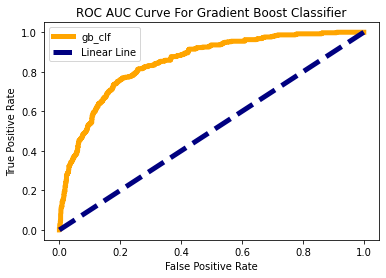

In [453]:
fpr, tpr, thresholds = roc_curve(y_test,gb_clf.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,gb_clf.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='gb_clf',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Gradient Boost Classifier")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [457]:
clfGBC_data = {'Model': ['Gradient Boost Classifier'],            
             'ROC_AUC Score': rocauc_scoreGBC,
             'CV Score': clfGBC_cvScore
            }

clf_GBC_df = pd.DataFrame(clfGBC_data)  
clf_GBC_df

,Model,ROC_AUC Score,CV Score
0,Gradient Boost Classifier,0.776938,0.823401


# AdaBoost Classifier

In [458]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier()

In [459]:
params={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,250,500]
           }
params

{'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [10, 100, 250, 500]}

In [460]:
clf = GridSearchCV(ada_clf, params, cv=5,scoring="roc_auc")
clf.fit(features,target)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 250}

In [461]:
ada_clf=AdaBoostClassifier(learning_rate=0.01,n_estimators=250)
get_aucroc_score(ada_clf,features,target)

At 40  aucroc score is  0.7458278436539307
At 41  aucroc score is  0.740221912216797
At 42  aucroc score is  0.7434575938412256
At 43  aucroc score is  0.7618822496060347
At 44  aucroc score is  0.7560063551112144
At 45  aucroc score is  0.7398176134749025
At 46  aucroc score is  0.7425249941873983
At 47  aucroc score is  0.7158877780361156
At 48  aucroc score is  0.7554896794027228
At 49  aucroc score is  0.7296391020176186
At 50  aucroc score is  0.7396716525872535
At 51  aucroc score is  0.7571301247771837
At 52  aucroc score is  0.749142318323904
At 53  aucroc score is  0.7499625410111344
At 54  aucroc score is  0.7582758531607636
At 55  aucroc score is  0.7522656229817355
At 56  aucroc score is  0.7252912759306621
At 57  aucroc score is  0.7232801157353587
At 58  aucroc score is  0.7506251776072749
At 59  aucroc score is  0.7202691880441241
At 60  aucroc score is  0.7547482497610375
At 61  aucroc score is  0.740446666149991
At 62  aucroc score is  0.740367873104446
At 63  aucroc s

64

In [478]:
x_train, x_test, y_train, y_test = train_test_split(features,target,random_state=64,test_size=0.20,stratify=target)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
ada_clf.fit(x_train,y_train)
pred_train=ada_clf.predict(x_train)
pred_test=ada_clf.predict(x_test)
rocauc_scoreADA=roc_auc_score(y_test,pred_test)
rocauc_scoreADA

0.7677581441008552

In [482]:
clfADA_cvScore=cross_val_score(ada_clf,features,target,cv=5).mean()
clfADA_cvScore

0.772399428995419

In [466]:
# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.93      0.68      0.79      1035
           1       0.49      0.86      0.62       374

    accuracy                           0.73      1409
   macro avg       0.71      0.77      0.70      1409
weighted avg       0.81      0.73      0.74      1409

Confusion Matrix
 [[704 331]
 [ 54 320]]


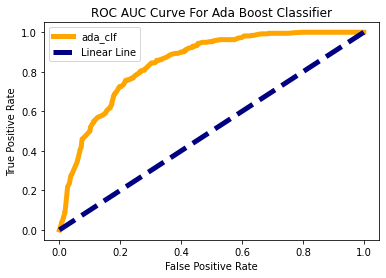

In [468]:
fpr, tpr, thresholds = roc_curve(y_test,ada_clf.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,ada_clf.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='ada_clf',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Ada Boost Classifier")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [483]:
clfADA_data = {'Model': ['Ada Boost Classifier'],            
             'ROC_AUC Score': rocauc_scoreADA,
             'CV Score': clfADA_cvScore
            }

clf_ADA_df = pd.DataFrame(clfADA_data)  
clf_ADA_df

,Model,ROC_AUC Score,CV Score
0,Ada Boost Classifier,0.767758,0.772399


In [484]:
modelDF=pd.concat([clf_LR_df,clf_KNN_df,clf_Tree_df,clf_NB_df,clf_Forest_df,clf_ADA_df,clf_GBC_df]).reset_index()
modelDF.drop(columns=['index'],axis=1,inplace=True)
modelDF

,Model,ROC_AUC Score,CV Score
0,Logistic Regression,0.790408,0.781837
1,KNeighborsClassifier,0.738650,0.777020
2,Decison Tree Classifier,0.703330,0.743627
3,Gaussian NB,0.773500,0.758769
4,RandomForestClassifier,0.763048,0.799376
5,Ada Boost Classifier,0.767758,0.772399
6,Gradient Boost Classifier,0.776938,0.823401


We see that Logistic Regression and Naive Byes  are good for our problem, but the best is Logistic Regression as it has the maximum ROC_AUC Score.
If we see the difference between ROC_AUC score and CV Score is also minimum for Logistic Regression, other models seems to be slightly overfit

# Plottting combined ROC AUC Curve

In [485]:
roc_auc_dict = {} #ROC AUC dict for TPR and FPR values
precision_recall_dict = {} #precision recall dictionary

def modify_roc_auc_dict(clf, y_test, x_test, name ,modify_dictionary):
    # Modifies a dictionary in place and adds keys for ROC AUC metrics
    fpr, tpr, thresholds = roc_curve(y_test,clf.predict_proba(x_test)[:,1],pos_label=1)
    clf_roc_auc_dict = {'fpr':fpr, 'tpr': tpr, 'thresholds': thresholds}
    modify_dictionary[name] = clf_roc_auc_dict
    
def modify_precision_recall_dict(clf, y_test, x_test, name ,modify_dictionary):
    # Modifies a dictionary in place and adds keys for precision recall metrics
    precision, recall, thresholds = precision_recall_curve(y_test,clf.predict_proba(x_test)[:,1],pos_label=1)
    precision_recall_dict = {'precision':precision, 'recall': recall, 'thresholds': thresholds}
    modify_dictionary[name] = precision_recall_dict

In [486]:
def fit_clf(clf, x_train, y_train, x_test, y_test, name='clf'): 
    clf.fit(x_train, y_train) 
    y_pred = clf.predict(x_test)
    class_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
    class_report['clf'] = name 
    return class_report

In [487]:
lgr_report = fit_clf(lgr, x_train, y_train, x_test, y_test, name='Logistic Regression')
lgr_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.893452,0.547244,0.76863,0.720348,0.801556,Logistic Regression
recall,0.777778,0.743316,0.76863,0.760547,0.768630,Logistic Regression
f1-score,0.831612,0.630385,0.76863,0.730999,0.778199,Logistic Regression
support,1035.000000,374.000000,0.76863,1409.000000,1409.000000,Logistic Regression


In [488]:
knn_report = fit_clf(knn, x_train, y_train, x_test, y_test, name='KNeighborsClassifier')
knn_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.877765,0.489091,0.726047,0.683428,0.774597,KNeighborsClassifier
recall,0.728502,0.719251,0.726047,0.723877,0.726047,KNeighborsClassifier
f1-score,0.796199,0.582251,0.726047,0.689225,0.739409,KNeighborsClassifier
support,1035.000000,374.000000,0.726047,1409.000000,1409.000000,KNeighborsClassifier


In [491]:
tree_report = fit_clf(decTree, x_train, y_train, x_test, y_test, name='DecisionTreeClassifier')
tree_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.842365,0.543147,0.758694,0.692756,0.762941,DecisionTreeClassifier
recall,0.826087,0.572193,0.758694,0.699140,0.758694,DecisionTreeClassifier
f1-score,0.834146,0.557292,0.758694,0.695719,0.760659,DecisionTreeClassifier
support,1035.000000,374.000000,0.758694,1409.000000,1409.000000,DecisionTreeClassifier


In [492]:
naiveByes_report = fit_clf(nb, x_train, y_train, x_test, y_test, name='NaiveByesClassifier')
naiveByes_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.888639,0.528846,0.755855,0.708743,0.793137,NaiveByesClassifier
recall,0.763285,0.735294,0.755855,0.749290,0.755855,NaiveByesClassifier
f1-score,0.821206,0.615213,0.755855,0.718209,0.766528,NaiveByesClassifier
support,1035.000000,374.000000,0.755855,1409.000000,1409.000000,NaiveByesClassifier


In [494]:
forest_report = fit_clf(forest, x_train, y_train, x_test, y_test, name='RandomForestClassifier')
forest_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.860421,0.628099,0.800568,0.744260,0.798754,RandomForestClassifier
recall,0.869565,0.609626,0.800568,0.739595,0.800568,RandomForestClassifier
f1-score,0.864969,0.618725,0.800568,0.741847,0.799607,RandomForestClassifier
support,1035.000000,374.000000,0.800568,1409.000000,1409.000000,RandomForestClassifier


In [495]:
gradient_report = fit_clf(gb_clf, x_train, y_train, x_test, y_test, name='GradientBoostClassifier')
gradient_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.883077,0.599078,0.7956,0.741078,0.807693,GradientBoostClassifier
recall,0.831884,0.695187,0.7956,0.763536,0.795600,GradientBoostClassifier
f1-score,0.856716,0.643564,0.7956,0.750140,0.800138,GradientBoostClassifier
support,1035.000000,374.000000,0.7956,1409.000000,1409.000000,GradientBoostClassifier


In [496]:
ada_report = fit_clf(ada_clf, x_train, y_train, x_test, y_test, name='AdaBoostClassifier')
ada_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.925878,0.495312,0.730305,0.710595,0.811590,AdaBoostClassifier
recall,0.687923,0.847594,0.730305,0.767758,0.730305,AdaBoostClassifier
f1-score,0.789357,0.625247,0.730305,0.707302,0.745796,AdaBoostClassifier
support,1035.000000,374.000000,0.730305,1409.000000,1409.000000,AdaBoostClassifier


In [497]:
#Lets Check the Keys which we have
roc_auc_dict.keys()

dict_keys([])

In [499]:
modify_roc_auc_dict(clf=lgr,y_test=y_test,x_test=x_test,name='LogisticRegresssion',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=knn,y_test=y_test,x_test=x_test,name='KNeighborsClassifier',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=decTree,y_test=y_test,x_test=x_test,name='DecisionTreeClassifier',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=forest,y_test=y_test,x_test=x_test,name='RandomForestClassifier',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=nb,y_test=y_test,x_test=x_test,name='NaiveByes',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=gb_clf,y_test=y_test,x_test=x_test,name='GradientBoostClassifier',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=ada_clf,y_test=y_test,x_test=x_test,name='AdaBoostClassifier',modify_dictionary=roc_auc_dict)

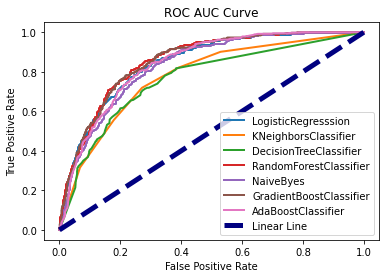

In [503]:
for key in roc_auc_dict:
    clf = roc_auc_dict[key]
    plt.plot(clf['fpr'], clf['tpr'], label=key,lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()
plt.show()

# Predict Test Cases

In [519]:
#Predicting the test cases
predict_CustomerChurn = pd.DataFrame( { 'actual':  y_test,
                                      'predicted': lgr.predict( x_test),
                                      'Correctly_Predicted':(y_test)-(lgr.predict(x_test))
                                    } )
predict_CustomerChurn

,actual,predicted,Correctly_Predicted
0,0,1,-1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0
...,...,...,...
1404,0,1,-1
1405,1,1,0
1406,0,0,0
1407,0,1,-1


In [520]:
predict_CustomerChurn = predict_CustomerChurn.reset_index()

In [521]:
predict_CustomerChurn['Correctly_Predicted'].value_counts()

 0    1083
-1     230
 1      96
Name: Correctly_Predicted, dtype: int64

We see that 1179 records were precited correctly out of 1409,Thereby having an accuracy of 83.67%, Hence our model is performing well

<AxesSubplot:xlabel='Correctly_Predicted', ylabel='count'>

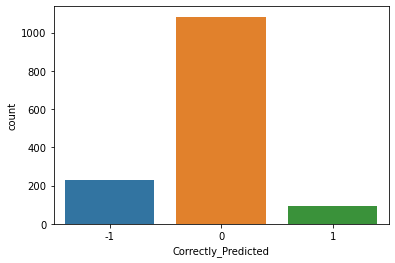

In [511]:
sns.countplot(predict_CustomerChurn.Correctly_Predicted)

# Saving the model

In [504]:
from joblib import dump , load
dump(lgr,'CustomerChurn.joblib')
lgr_load=load('CustomerChurn.joblib')

In [505]:
from tempfile import mkdtemp
savedir = mkdtemp()
import os
filename = os.path.join(savedir, 'CustomerChurn.joblib')

In [506]:
import joblib
joblib.dump(lgr, filename)

['C:\\Users\\mum1user\\AppData\\Local\\Temp\\tmpx7_8ggcg\\CustomerChurn.joblib']

In [507]:
joblib.load(filename)

LogisticRegression()